In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.

In [2]:
#reads the csv
stocks = pd.read_csv('STOCKDATA.csv')
#creates a correlation matrix
cor_matrix1 = stocks.iloc[:,1:].corr()
cor_matrix = stocks.corr()
#shows the first 5 rows
cor_matrix.head()


,BRK-A,V,MA,GS,BAC,JPM,WFC-PL,PYPL,WFC,C,...,WRB,FNF,LNC,SBNY,HBANO,CNA,IVZ,FDS,LPLA,ATH
BRK-A,1.000000,0.326537,0.335555,0.439920,0.631294,0.761247,0.530021,0.199396,0.204438,0.465033,...,0.514118,0.600109,0.288986,0.332496,0.275723,0.277673,0.148386,0.221278,0.621367,0.560071
V,0.326537,1.000000,0.993848,-0.221282,-0.177815,0.144107,0.725322,0.828656,-0.714173,-0.365705,...,0.804646,0.049205,-0.652291,-0.390237,-0.178654,-0.617529,-0.753177,0.924275,0.751253,-0.459494
MA,0.335555,0.993848,1.000000,-0.216184,-0.181043,0.131757,0.712157,0.842491,-0.725558,-0.381890,...,0.796265,0.040999,-0.661523,-0.399039,-0.178097,-0.626910,-0.746072,0.926929,0.753593,-0.456121
GS,0.439920,-0.221282,-0.216184,1.000000,0.747526,0.626653,0.107527,-0.137782,0.512862,0.689371,...,-0.077189,0.546031,0.666807,0.707590,0.621481,0.554154,0.735115,-0.260264,0.172683,0.746535
BAC,0.631294,-0.177815,-0.181043,0.747526,1.000000,0.907892,0.302394,-0.383746,0.747022,0.935229,...,0.205615,0.843658,0.774101,0.816814,0.630390,0.747042,0.621327,-0.341010,0.373214,0.837460


In [3]:
header = stocks.columns
header

Index(['Date', 'BRK-A', 'V', 'MA', 'GS', 'BAC', 'JPM', 'WFC-PL', 'PYPL', 'WFC',
       ...
       'WRB', 'FNF', 'LNC', 'SBNY', 'HBANO', 'CNA', 'IVZ', 'FDS', 'LPLA',
       'ATH'],
      dtype='object', length=101)

In [4]:
cor_matrix.shape

(100, 100)

In [5]:
#converting an matrix to 2-D array
cor_matrix=np.matrix(cor_matrix)
print(cor_matrix)


[[ 1.          0.32653663  0.33555533 ...  0.22127845  0.62136651
   0.56007143]
 [ 0.32653663  1.          0.9938484  ...  0.92427491  0.75125342
  -0.45949359]
 [ 0.33555533  0.9938484   1.         ...  0.92692867  0.75359276
  -0.45612102]
 ...
 [ 0.22127845  0.92427491  0.92692867 ...  1.          0.64303283
  -0.51065671]
 [ 0.62136651  0.75125342  0.75359276 ...  0.64303283  1.
   0.09317245]
 [ 0.56007143 -0.45949359 -0.45612102 ... -0.51065671  0.09317245
   1.        ]]


In [6]:
#adjacency matrix for correlation greater than 0
size=len(cor_matrix)
adj_greater_0 = [[0]*size for i in range(size)]

for row in range( size):
    for col in range (size):
        if cor_matrix[row,col]>0:
            adj_greater_0[row][col]=1


In [7]:
#adjacency matrix for correlation less than 0

adj_less_0 = [[0]*size for i in range(size)]

for row in range( size):
    for col in range (size):
        if cor_matrix[row,col]<0:
            adj_less_0[row][col]=1

In [8]:
#adjacency matrix for correlation between -0.7 and 0.7

adj_btw_1 = [[0]*size for i in range(size)]

for row in range( size):
    for col in range (size):
        if cor_matrix[row, col]>-0.7 and cor_matrix[row, col]<0.7:
            adj_btw_1[row][col]=1


Grapgh for where correlations are below 0


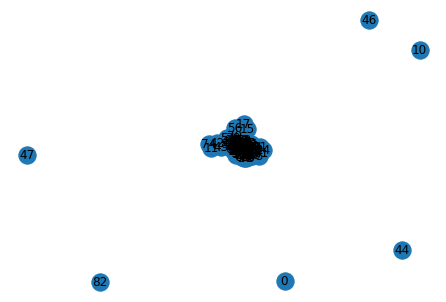

In [9]:
print("Grapgh for where correlations are below 0")
B= nx.from_numpy_matrix(np.array(adj_less_0))  
nx.draw(B, with_labels=True)


In [10]:
print(nx.info(B))


Name: 
Type: Graph
Number of nodes: 100
Number of edges: 1291
Average degree:  25.8200


Grapgh for where correlations are between -0.7 and 0.7


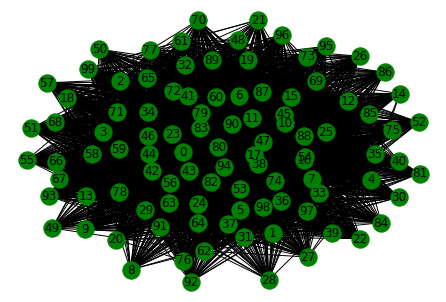

In [11]:
print("Grapgh for where correlations are between -0.7 and 0.7")
G = nx.from_numpy_matrix(np.array(adj_btw_1))  
nx.draw(G, with_labels=True, node_color= "green") 

In [12]:
#returns grapgh info
print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 100
Number of edges: 3416
Average degree:  68.3200


Grapgh for where correlations are above 0


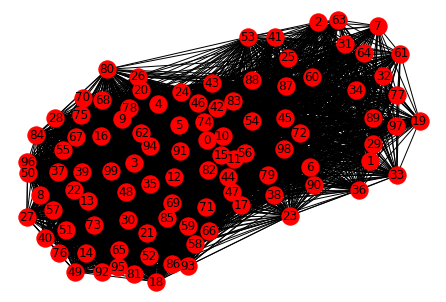

In [13]:
print("Grapgh for where correlations are above 0")
A = nx.from_numpy_matrix(np.array(adj_greater_0))  
nx.draw(A, with_labels=True, node_color = "red") 

In [14]:
print(nx.info(A))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 3759
Average degree:  75.1800


## Centrality

In [15]:
def centrality_fctn(G):
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by degree:")
    for d in sorted_degree[:5]:
        print(d)


## Community Structure

In [16]:
def community_fctn(G):
    #determine the number of communities appropriate for the graph, and groups all nodes into subsets based on these communities
    print("Community stucture is :")
    communities = community.greedy_modularity_communities(G)
    for i,c in enumerate(communities): # Loop through the list of communities
        print('Group '+str(i)+':', list(c)) # Print out the classes and their members

## clustering coefficient

In [17]:
def clustering(G):
    #local clustering
    print("\n local clustering are: \n \n", nx.clustering(G))
    
    #global clustering
    print("global clustering is:", nx.average_clustering(G))

In [18]:
#for grapgh where correlation is above 0
centrality_fctn(A)
community_fctn(A)
clustering(A)

Top 5 nodes by degree:
(0, 101)
(10, 101)
(44, 101)
(46, 101)
(47, 101)
Community stucture is :
Group 0: [3, 4, 5, 8, 9, 12, 13, 14, 16, 18, 20, 21, 22, 24, 26, 27, 28, 30, 35, 37, 39, 40, 48, 49, 50, 51, 52, 55, 57, 58, 59, 62, 65, 66, 67, 68, 69, 70, 71, 73, 75, 76, 78, 80, 81, 84, 85, 86, 91, 92, 93, 94, 95, 96, 99]
Group 1: [0, 1, 2, 6, 7, 10, 11, 15, 17, 19, 23, 25, 29, 31, 32, 33, 34, 36, 38, 41, 42, 43, 44, 45, 46, 47, 53, 54, 56, 60, 61, 63, 64, 72, 74, 77, 79, 82, 83, 87, 88, 89, 90, 97, 98]

 local clustering are: 
 
 {0: 0.7338693052978768, 1: 0.9663120567375887, 2: 0.9663120567375887, 3: 0.8825949367088608, 4: 0.8686453129591537, 5: 0.783325370281892, 6: 0.8149068322981367, 7: 1.0, 8: 0.9696969696969697, 9: 0.8939873417721519, 10: 0.7338693052978768, 11: 0.7331140350877193, 12: 0.857429718875502, 13: 0.9705882352941176, 14: 0.9875, 15: 0.7393057110862262, 16: 0.9172932330827067, 17: 0.7358247422680413, 18: 0.917634996582365, 19: 0.992600422832981, 20: 0.8686453129591537, 21

In [19]:
#for grapgh where correlation is below 0
centrality_fctn(B)
community_fctn(B)
clustering(B)

Top 5 nodes by degree:
(7, 57)
(19, 55)
(61, 55)
(77, 55)
(32, 54)
Community stucture is :
Group 0: [1, 2, 3, 4, 5, 7, 9, 12, 16, 18, 19, 20, 21, 22, 24, 26, 29, 30, 31, 32, 33, 34, 35, 36, 48, 52, 58, 59, 61, 62, 63, 64, 66, 68, 69, 70, 71, 75, 77, 78, 81, 85, 86, 89, 91, 93, 94, 95, 97, 99]
Group 1: [6, 8, 11, 13, 14, 15, 17, 23, 25, 27, 28, 37, 38, 39, 40, 41, 42, 43, 45, 49, 50, 51, 53, 54, 55, 56, 57, 60, 65, 67, 72, 73, 74, 76, 79, 80, 83, 84, 87, 88, 90, 92, 96, 98]
Group 2: [0]
Group 3: [10]
Group 4: [44]
Group 5: [46]
Group 6: [47]
Group 7: [82]

 local clustering are: 
 
 {0: 0, 1: 0.001568627450980392, 2: 0.001568627450980392, 3: 0.011695906432748537, 4: 0, 5: 0, 6: 0, 7: 0.02506265664160401, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0.004597701149425287, 14: 0.0071301247771836, 15: 0, 16: 0.004329004329004329, 17: 0, 18: 0, 19: 0.0013468013468013469, 20: 0, 21: 0, 22: 0, 23: 0.10804597701149425, 24: 0, 25: 0.0015873015873015873, 26: 0, 27: 0.0053475935828877, 28: 0.0049261083743

In [20]:
#for grapgh where correlations are between -0.7 and 0.7
centrality_fctn(G)
community_fctn(G)
clustering(G)

Top 5 nodes by degree:
(80, 95)
(11, 94)
(23, 94)
(47, 94)
(0, 93)
Community stucture is :
Group 0: [3, 4, 5, 7, 12, 15, 18, 22, 23, 24, 25, 27, 28, 29, 30, 31, 34, 36, 39, 40, 41, 42, 43, 44, 46, 49, 50, 51, 53, 54, 55, 56, 57, 63, 69, 71, 80, 81, 83, 84, 92, 94, 95, 96]
Group 1: [0, 2, 8, 10, 11, 13, 14, 16, 19, 20, 26, 33, 35, 37, 38, 45, 48, 58, 59, 60, 61, 62, 65, 66, 67, 68, 70, 72, 73, 76, 77, 78, 79, 82, 85, 87, 88, 89, 90, 91, 93, 97, 98]
Group 2: [64, 1, 32, 99, 6, 9, 74, 75, 47, 17, 52, 21, 86]

 local clustering are: 
 
 {0: 0.6720430107526881, 1: 0.6390168970814132, 2: 0.6292966684294025, 3: 0.7156756756756757, 4: 0.7212156633547633, 5: 0.6653091447611995, 6: 0.6107594936708861, 7: 0.670995670995671, 8: 0.7712585034013606, 9: 0.7061224489795919, 10: 0.6274509803921569, 11: 0.6623198352779684, 12: 0.6841807909604519, 13: 0.7491039426523297, 14: 0.7686170212765957, 15: 0.6151234567901235, 16: 0.7242134062927497, 17: 0.6679407548972767, 18: 0.7274633123689728, 19: 0.666346153

# Report

### Centrality...which nodes appear to most important?

- For graph A the node which appear most is (0,101)
- For graph B the node which appear most is (7,10)
- For graph G, all the nodes has the same frequency so the most important is the first one that is (0,99)


### Community structure...do certain groups of shares behave in similar ways?

- Yes, example in graph B, group 2,3,4,5,6,7 have one member each because the nodes are not connected to any other node in the graph

### Clustering coefficient...how does this change over time/choice of t, t1, t2?

- As the value of t increases the global clustering increases.
- For grapgh A and B, local clustering has no uniformity
- For graph G, both local and global clustering are 1.0, this is because the coefficient has to be greater than t1 but less than t2 (ranges)